# Demo for Teaching UNCC Data Bootcamp - Gradient Descent for Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
X = np.array([i for i in range(100)])

In [5]:
X

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [6]:
X = X.reshape(100,1)

In [7]:
X.size

100

In [8]:
X.shape

(100, 1)

In [9]:
X

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64],
       [65],
       [66],
       [67],
       [68],
       [69],
       [70],
       [71],
       [72],
       [73],
       [74],
       [75],
       [76],

In [33]:
y = np.array([x*3 + np.random.randn()*3 for x in X])

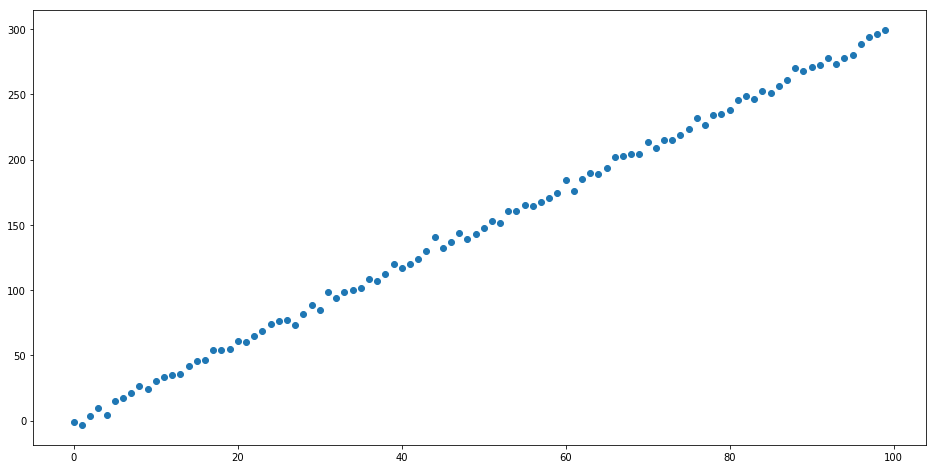

In [34]:
plt.figure(figsize=(16,8))
plt.scatter(X, y)

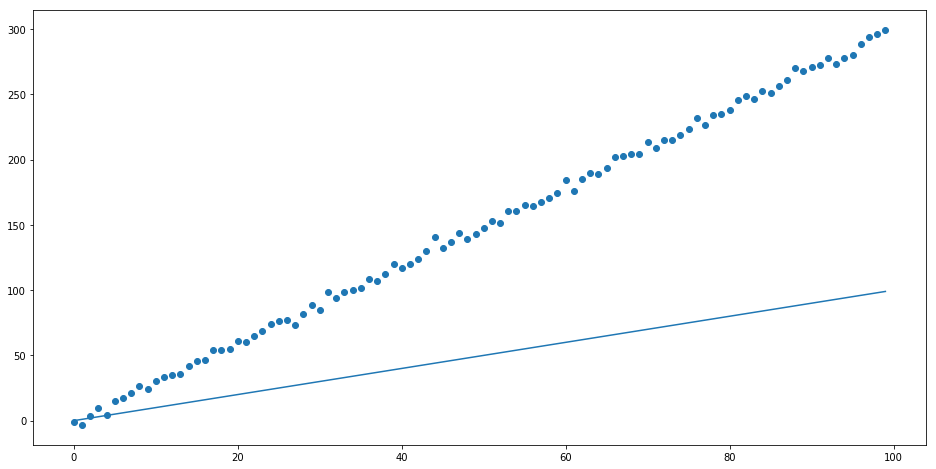

In [35]:
mannual_guess = 1
plt.figure(figsize=(16,8))
plt.scatter(X, y)
plt.plot(X*mannual_guess)

### Is this a good guess?

We know the truth is suppose to be "3" as the coefficient for x. How do we get the computer to learn this?

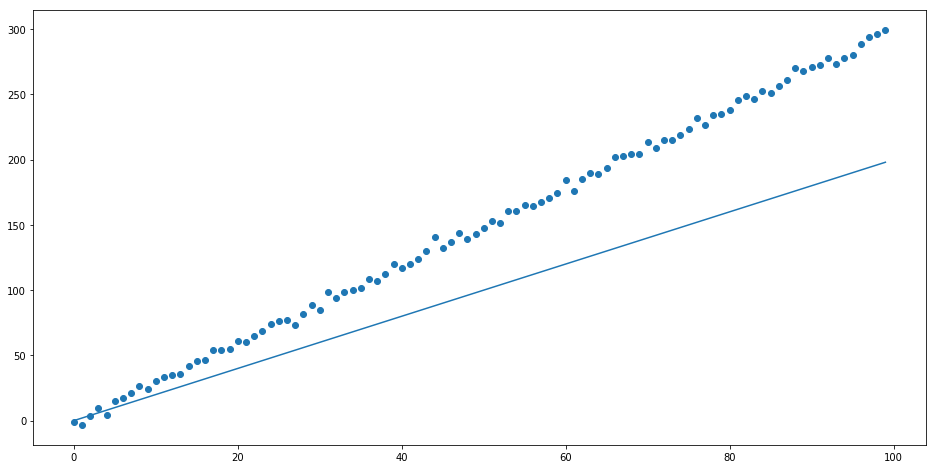

In [36]:
mannual_guess = 2
plt.figure(figsize=(16,8))
plt.scatter(X, y)
plt.plot(X*mannual_guess)

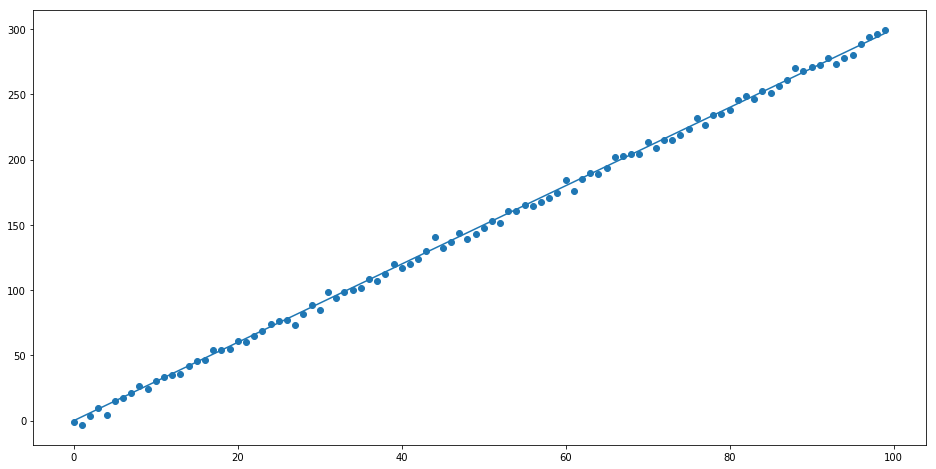

In [37]:
mannual_guess = 3
plt.figure(figsize=(16,8))
plt.scatter(X, y)
plt.plot(X*mannual_guess)

### The line of best fit needs to be around 3 as the X coefficient. We will need to get the machine to "step" towards this number.

$$
pred = \begin{bmatrix} X_{n} \end{bmatrix} \bullet W
$$

In [40]:
w = np.array([[2]])
print(w)
ypred = np.dot(X, w)
print(ypred)

[[2]]
[[  0]
 [  2]
 [  4]
 [  6]
 [  8]
 [ 10]
 [ 12]
 [ 14]
 [ 16]
 [ 18]
 [ 20]
 [ 22]
 [ 24]
 [ 26]
 [ 28]
 [ 30]
 [ 32]
 [ 34]
 [ 36]
 [ 38]
 [ 40]
 [ 42]
 [ 44]
 [ 46]
 [ 48]
 [ 50]
 [ 52]
 [ 54]
 [ 56]
 [ 58]
 [ 60]
 [ 62]
 [ 64]
 [ 66]
 [ 68]
 [ 70]
 [ 72]
 [ 74]
 [ 76]
 [ 78]
 [ 80]
 [ 82]
 [ 84]
 [ 86]
 [ 88]
 [ 90]
 [ 92]
 [ 94]
 [ 96]
 [ 98]
 [100]
 [102]
 [104]
 [106]
 [108]
 [110]
 [112]
 [114]
 [116]
 [118]
 [120]
 [122]
 [124]
 [126]
 [128]
 [130]
 [132]
 [134]
 [136]
 [138]
 [140]
 [142]
 [144]
 [146]
 [148]
 [150]
 [152]
 [154]
 [156]
 [158]
 [160]
 [162]
 [164]
 [166]
 [168]
 [170]
 [172]
 [174]
 [176]
 [178]
 [180]
 [182]
 [184]
 [186]
 [188]
 [190]
 [192]
 [194]
 [196]
 [198]]


In [41]:
print(X.shape, w.shape)

(100, 1) (1, 1)


The dot product is the sum of each row element in the first Matrix multipled to its corresponding element in the column of the second Matrix such that the inner shapes of the two Matrices are the same. The resulting Matrix has the shape of the outer shapes of the original two Matrices.

In [42]:
ypred.shape

(100, 1)

In [43]:
y.shape

(100, 1)

# So is my prediction good or not?

Well, what is the error of the prediction? In other words, how far is each predicted point from its actual point?

$$
error = h(\theta^i) - y^i
$$

But I need to know the total "error" of all the points? I need to take the sum of the squared errors and then divide by the number of points to get a gauge of the overall "badness" of my prediction line ... why squared?

$$
MSE = \frac{\sum_{i=1}^{m} (h(\theta^i) - y^i)^2} {m}
$$

Now, we modify this slightly such that we multiply a 0.5 or a 1/2 in front of the summation (but note that this is for mathematics purposes, not the original intended measurement of MSE). You will see that this will make our gradient derivative work out nicer.

$$
MSE = \frac{1}{2} * \frac{\sum_{i=1}^{m} (h(\theta^i) - y^i)^2} {m}
$$

Or better yet  

$$
MSE = \frac{1}{2m} {\sum_{i=1}^{m} (h(\theta^i) - y^i)^2}
$$

In [46]:
# checkpoint, let's do some examples

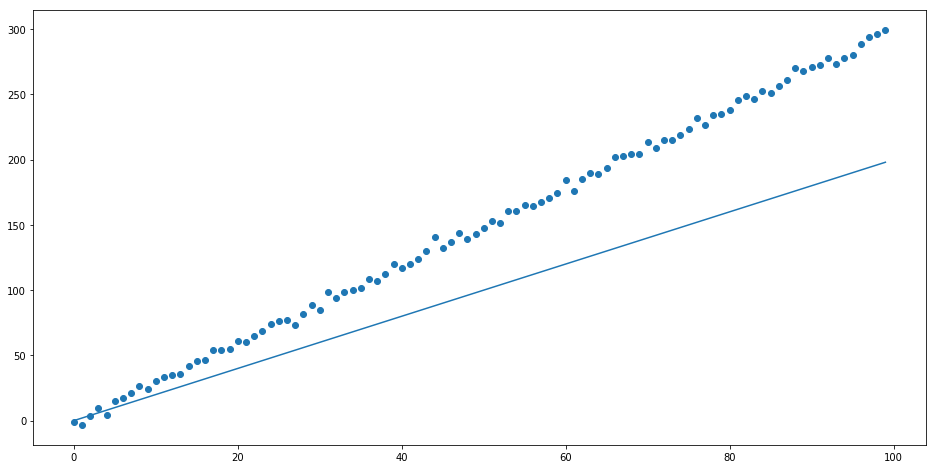

In [48]:
mannual_guess = 2
plt.figure(figsize=(16,8))
plt.scatter(X, y)
plt.plot(X*mannual_guess)

In the case where I guess that the weight of my X coefficient is 2 when I know the truth is 3, how off is this line overall?

1613.4019619693959


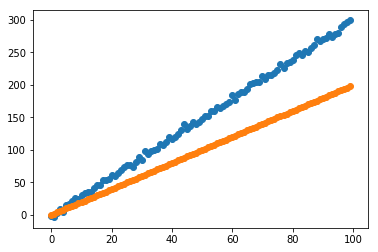

In [55]:
mannual_guess = np.array([[2]])
ypred = np.dot(X, mannual_guess)
plt.scatter(X, y)
plt.scatter(X, ypred)
mse = np.sum(np.square(ypred - y)) * 1/(len(X)*2)
print(mse)

398.62664884001106


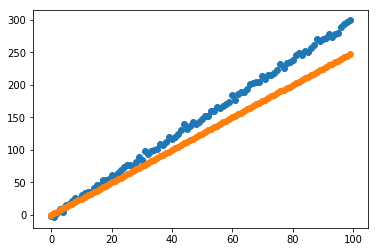

In [56]:
mannual_guess = np.array([[2.5]])
ypred = np.dot(X, mannual_guess)
plt.scatter(X, y)
plt.scatter(X, ypred)
mse = np.sum(np.square(ypred - y)) * 1/(len(X)*2)
print(mse)

4.5597669732140975


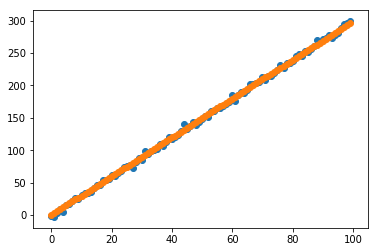

In [57]:
mannual_guess = np.array([[2.99]])
ypred = np.dot(X, mannual_guess)
plt.scatter(X, y)
plt.scatter(X, ypred)
mse = np.sum(np.square(ypred - y)) * 1/(len(X)*2)
print(mse)

431.7010225812418


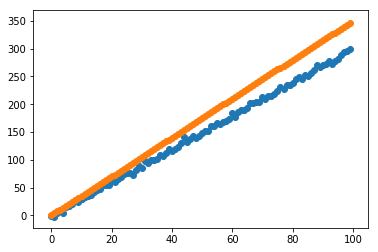

In [58]:
mannual_guess = np.array([[3.5]])
ypred = np.dot(X, mannual_guess)
plt.scatter(X, y)
plt.scatter(X, ypred)
mse = np.sum(np.square(ypred - y)) * 1/(len(X)*2)
print(mse)

1679.550709451857


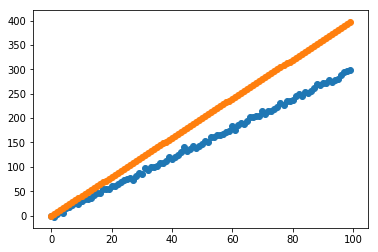

In [59]:
mannual_guess = np.array([[4]])
ypred = np.dot(X, mannual_guess)
plt.scatter(X, y)
plt.scatter(X, ypred)
mse = np.sum(np.square(ypred - y)) * 1/(len(X)*2)
print(mse)

### As I approach the "truth" weight of 3, my MSE got smaller and smaller. Once I went over 3, it got bigger and bigger again. 
## There must be some sort of parabolic relationship! Yes, it's in the equation... And if there is a parabola, then there is a derivative to find the local minimum!

So, what if I just programmatically try a bunch of weights, until I get one that results in a very small MSE?

In [62]:
w = np.linspace(0, 6, num=200)

In [63]:
w

array([0.        , 0.03015075, 0.06030151, 0.09045226, 0.12060302,
       0.15075377, 0.18090452, 0.21105528, 0.24120603, 0.27135678,
       0.30150754, 0.33165829, 0.36180905, 0.3919598 , 0.42211055,
       0.45226131, 0.48241206, 0.51256281, 0.54271357, 0.57286432,
       0.60301508, 0.63316583, 0.66331658, 0.69346734, 0.72361809,
       0.75376884, 0.7839196 , 0.81407035, 0.84422111, 0.87437186,
       0.90452261, 0.93467337, 0.96482412, 0.99497487, 1.02512563,
       1.05527638, 1.08542714, 1.11557789, 1.14572864, 1.1758794 ,
       1.20603015, 1.2361809 , 1.26633166, 1.29648241, 1.32663317,
       1.35678392, 1.38693467, 1.41708543, 1.44723618, 1.47738693,
       1.50753769, 1.53768844, 1.5678392 , 1.59798995, 1.6281407 ,
       1.65829146, 1.68844221, 1.71859296, 1.74874372, 1.77889447,
       1.80904523, 1.83919598, 1.86934673, 1.89949749, 1.92964824,
       1.95979899, 1.98994975, 2.0201005 , 2.05025126, 2.08040201,
       2.11055276, 2.14070352, 2.17085427, 2.20100503, 2.23115

That's a lot of weights to try!

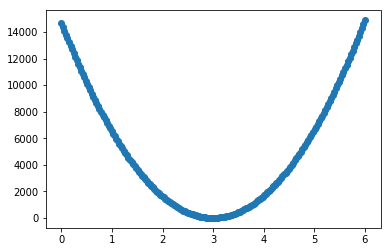

In [66]:
mselist = []
for wi in w:
    ypred = np.dot(X, np.array([[wi]]))
    mselist.append(np.sum(np.square(ypred - y)) * 1/(len(X)*2))

plt.scatter(w, mselist)

# Amazing. 

### 3, which we know is the truth, resulted in the lowest total error, so it must be the weight coefficient we want. So, how do I get the "machine" to "walk towards" this minimum value that occurred at weight 3?

# Gradient Descent 

In [94]:
def gradientDescent(X, y, theta=1, lr=0.0001):
    
    ypred = np.dot(X, theta)
    loss = ypred - y
    m = len(X)

    cost = np.sum(loss ** 2) * (1/(2*m))

    # print(cost)

    gradient = np.dot(X.T, loss) / m

    theta = theta - (lr * gradient)
        
    return theta


[[1.65339256]]
[[2.09224368]]
[[2.38699803]]
[[2.58496979]]
[[2.71793752]]
[[2.8072453]]
[[2.86722887]]
[[2.90751683]]
[[2.93457624]]
[[2.9527507]]


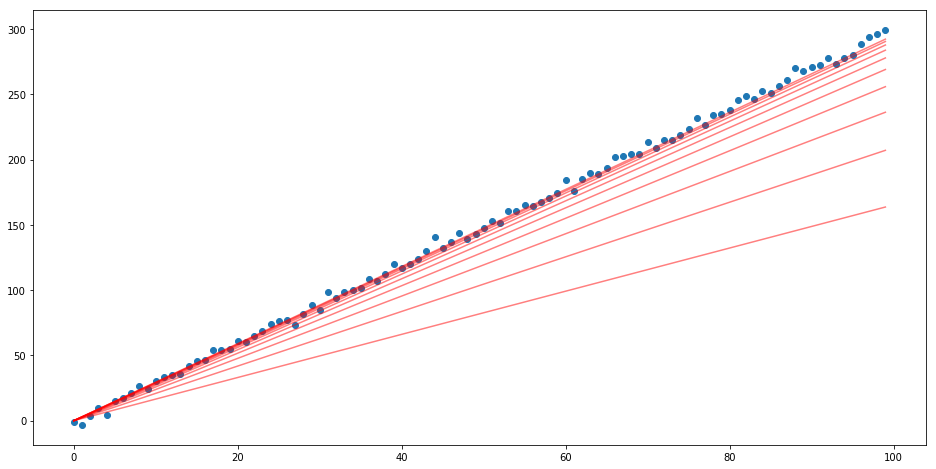

In [101]:
initTheta = 1
plt.figure(figsize=(16,8))
plt.scatter(X, y)

for i in range(10):
    initTheta = gradientDescent(X, y, theta=initTheta, lr=0.0001)
    print(initTheta)
    plt.plot(np.dot(X, initTheta), color="r", alpha=0.5)
    
plt.show()

[[1.65339256]]
[[2.09224368]]
[[2.38699803]]
[[2.58496979]]
[[2.71793752]]
[[2.8072453]]
[[2.86722887]]
[[2.90751683]]
[[2.93457624]]
[[2.9527507]]
[[2.96495757]]
[[2.97315631]]
[[2.978663]]
[[2.98236157]]
[[2.98484571]]
[[2.98651418]]
[[2.98763481]]
[[2.98838749]]
[[2.98889302]]
[[2.98923256]]


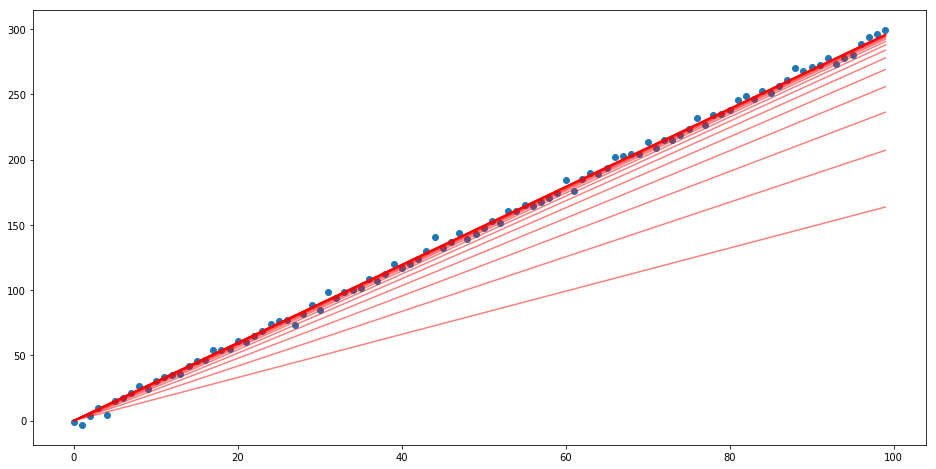

In [102]:
initTheta = 1
plt.figure(figsize=(16,8))
plt.scatter(X, y)

for i in range(20):
    initTheta = gradientDescent(X, y, theta=initTheta, lr=0.0001)
    print(initTheta)
    plt.plot(np.dot(X, initTheta), color="r", alpha=0.5)
    
plt.show()

# Can we reduce waste...?

In [108]:
[np.random.randint(100) for i in range(5)]

[28, 52, 35, 71, 62]

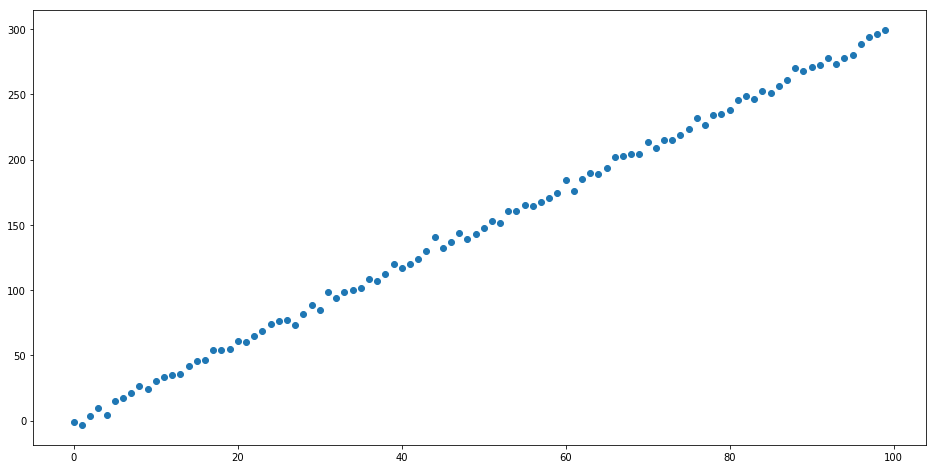

[[1.59344216]]


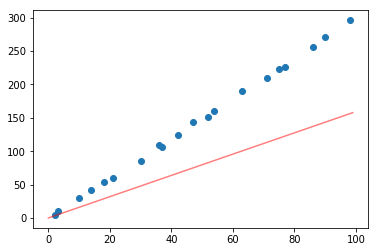

[[2.0127831]]


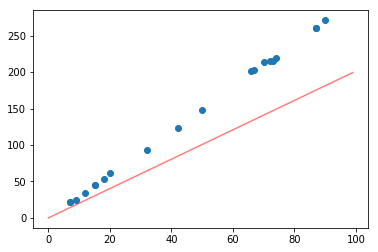

[[2.32351707]]


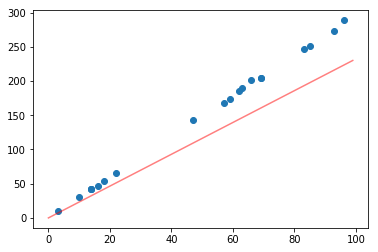

[[2.62907407]]


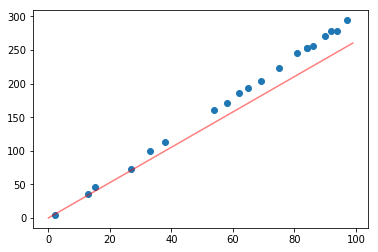

[[2.71541694]]


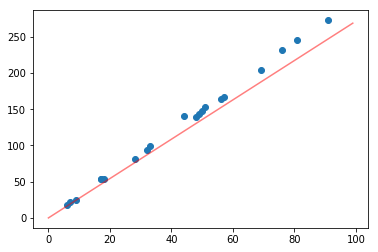

[[2.79715941]]


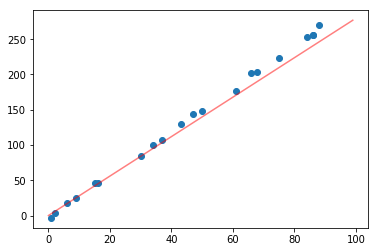

[[2.85450871]]


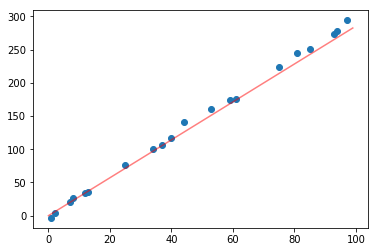

[[2.88762034]]


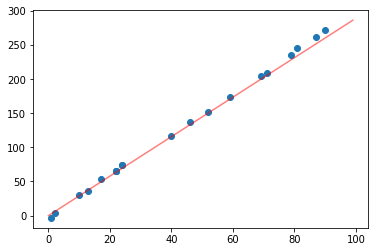

[[2.92777479]]


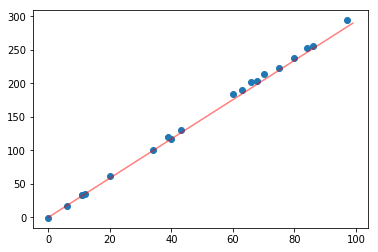

[[2.9475637]]


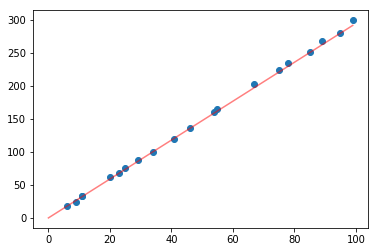

[[2.96584247]]


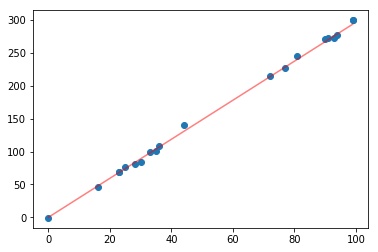

[[2.96769376]]


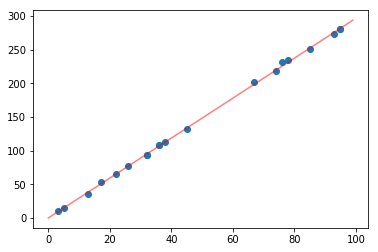

[[2.98386567]]


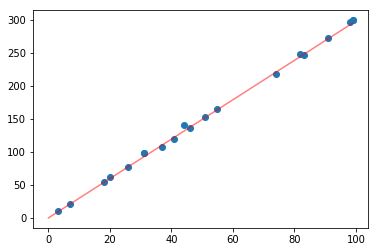

[[2.98110319]]


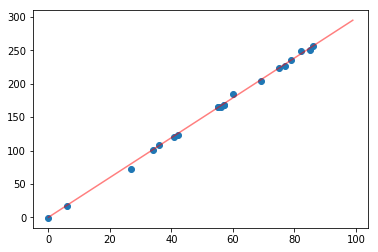

[[2.98730511]]


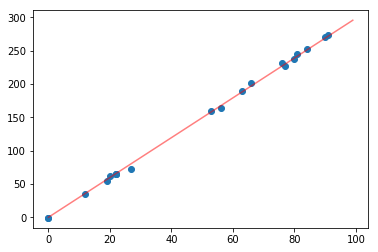

[[2.98782397]]


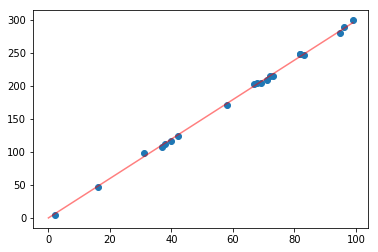

[[2.98825739]]


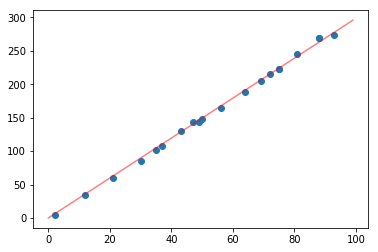

[[2.99383301]]


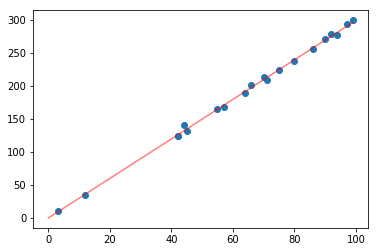

[[2.99662229]]


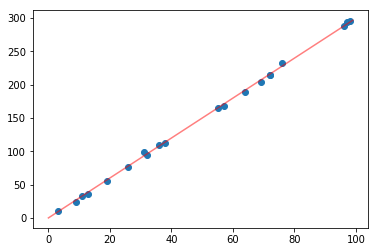

[[2.99219836]]


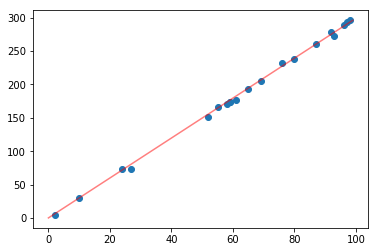

In [109]:
initTheta = 1
plt.figure(figsize=(16,8))
plt.scatter(X, y)
plt.show()

for i in range(20):
    idx = [np.random.randint(100) for i in range(20)]
    _X = X[idx]
    _y = y[idx]
    plt.scatter(_X, _y)
    initTheta = gradientDescent(_X, _y, theta=initTheta, lr=0.0001)
    print(initTheta)
    plt.plot(np.dot(X, initTheta), color="r", alpha=0.5)
    
    plt.show()